# Unsupervised clustering - refine dictionary

## Dataset loading

In [ ]:
import pandas as pd

df = pd.read_csv("20230214-dataset_preprocessed_with_lemma.csv", index_col=0)
df.head()

title_texte     85     44     50  \
1   ipa supply equipment increase competitiveness...  False   True  False   
3   provision language training service tender in...  False  False  False   
4   service support eda helicopter portfolio main...  False  False  False   
5   NUMBER cp op NUMBER pooling share cost non co...  False  False  False   
6   edf supply transport household similar waste ...  False  False  False   

      80     73     45     71     79     90  ...     18     03     24     43  \
1  False  False  False  False  False  False  ...  False  False  False  False   
3   True  False  False  False  False  False  ...  False  False  False  False   
4   True  False  False  False  False  False  ...  False  False  False  False   
5  False   True  False  False  False  False  ...  False  False  False  False   
6  False  False   True  False  False  False  ...  False  False  False  False   

      19     41     37     14     16     76  
1  False  False  False  False  False  False  
3  False  False  False  False  False  False  
4  False  False  False  False  False  False  
5  False  False  False  False  False  False  
6  False  False  False  False  False  False  

[5 rows x 46 columns]

## Dictionary refinement

In [ ]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel


def print_topics(excluded_words: list[str]):
    processed_docs = df["title_texte"].str.split(" ")
    dictionary = Dictionary(processed_docs)
    dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
    for word in excluded_words:
        if word in dictionary.token2id:
            dictionary.filter_tokens(bad_ids=[dictionary.token2id[word]])
    bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
    lda = LdaModel(bow_corpus, num_topics=18, id2word=dictionary, passes=5,
                   minimum_probability=0.0, random_state=0, alpha='symmetric', eta=0.5)
    for idx, topic in lda.print_topics(-1):
        print('-- Topic: {} --\n{}\n'.format(idx, topic))

In [ ]:
print_topics([])

-- Topic: 0 --
0.072*"application" + 0.061*"form" + 0.053*"NUMBER" + 0.033*"standard" + 0.033*"section" + 0.032*"candidate" + 0.032*"situation" + 0.030*"sign" + 0.029*"submit" + 0.029*"include"

-- Topic: 1 --
0.121*"contract" + 0.083*"tenderer" + 0.058*"provide" + 0.051*"guarantee" + 0.044*"NUMBER" + 0.026*"successful" + 0.025*"sign" + 0.022*"performance" + 0.022*"authority" + 0.022*"draw"

-- Topic: 2 --
0.089*"service" + 0.036*"european" + 0.030*"office" + 0.028*"provision" + 0.023*"event" + 0.021*"premise" + 0.014*"commission" + 0.014*"eu" + 0.014*"cleaning" + 0.013*"organisation"

-- Topic: 3 --
0.077*"building" + 0.051*"european" + 0.047*"NUMBER" + 0.034*"parliament" + 0.027*"work" + 0.022*"vehicle" + 0.021*"brussels" + 0.021*"contract" + 0.021*"maintenance" + 0.020*"council"

-- Topic: 4 --
0.041*"tender" + 0.026*"mobile" + 0.024*"procurement" + 0.021*"access" + 0.020*"court" + 0.017*"electronic" + 0.016*"internet" + 0.014*"justice" + 0.012*"radiation" + 0.011*"sensor"

-- Topic

In [ ]:
excluded_words = {"NUMBER", "standard", "section", "situation", "include", "contract", "tenderer", "successful",
                  "european", "provide", "commission", "eu", "parliament", "brussels", "council", "tender",
                  "procurement", "court", "justice", "use", "union", "lot", "framework", "year", "conclude",
                  "regulation", "directive", "consultancy", "eib", "subject", "authority", "scope", "institution",
                  "jrc", "include"}

In [ ]:
print_topics(excluded_words)

-- Topic: 0 --
0.060*"translation" + 0.051*"language" + 0.035*"english" + 0.025*"body" + 0.024*"french" + 0.024*"service" + 0.024*"text" + 0.023*"german" + 0.022*"centre" + 0.022*"field"

-- Topic: 1 --
0.019*"support" + 0.015*"system" + 0.013*"development" + 0.012*"objective" + 0.011*"datum" + 0.010*"service" + 0.010*"tool" + 0.009*"develop" + 0.009*"climate" + 0.008*"new"

-- Topic: 2 --
0.141*"service" + 0.059*"provision" + 0.032*"office" + 0.022*"agency" + 0.019*"premise" + 0.017*"travel" + 0.015*"cleaning" + 0.013*"staff" + 0.011*"maintenance" + 0.011*"clean"

-- Topic: 3 --
0.074*"training" + 0.039*"health" + 0.032*"safety" + 0.019*"food" + 0.018*"staff" + 0.015*"course" + 0.014*"control" + 0.014*"programme" + 0.013*"activity" + 0.013*"fire"

-- Topic: 4 --
0.039*"vehicle" + 0.030*"electronic" + 0.021*"communication" + 0.017*"response" + 0.016*"activity" + 0.016*"service" + 0.014*"supply" + 0.014*"information" + 0.013*"sea" + 0.010*"fishery"

-- Topic: 5 --
0.078*"guarantee" + 0.

In [ ]:
excluded_words = {"NUMBER", "standard", "section", "situation", "include", "contract", "tenderer", "successful",
                  "european", "provide", "commission", "eu", "parliament", "brussels", "council", "tender",
                  "procurement", "court", "justice", "use", "union", "lot", "framework", "year", "conclude",
                  "regulation", "directive", "consultancy", "eib", "subject", "authority", "scope", "institution",
                  "jrc", "include", "body", "new", "response", "day", "draw", "member", "de", "la", "luxembourg",
                  "committee", "region", "fwc", "ecb", "relate", "country", "extend", "contracting", "duration", "epo",
                  "esm", "list", "prag"}

In [ ]:
print_topics(excluded_words)

-- Topic: 0 --
0.098*"guarantee" + 0.047*"sign" + 0.044*"performance" + 0.041*"receive" + 0.040*"compliant" + 0.038*"send" + 0.038*"void" + 0.037*"period" + 0.037*"submit" + 0.037*"countersign"

-- Topic: 1 --
0.040*"service" + 0.032*"support" + 0.032*"communication" + 0.027*"information" + 0.026*"event" + 0.024*"activity" + 0.018*"organisation" + 0.017*"platform" + 0.016*"product" + 0.015*"production"

-- Topic: 2 --
0.052*"maintenance" + 0.046*"supply" + 0.045*"installation" + 0.039*"building" + 0.025*"equipment" + 0.024*"system" + 0.019*"work" + 0.017*"site" + 0.015*"nuclear" + 0.012*"gas"

-- Topic: 3 --
0.090*"service" + 0.062*"office" + 0.037*"premise" + 0.024*"provision" + 0.022*"cleaning" + 0.020*"house" + 0.018*"representation" + 0.016*"clean" + 0.015*"reception" + 0.015*"space"

-- Topic: 4 --
0.041*"technical" + 0.041*"assistance" + 0.036*"project" + 0.026*"support" + 0.023*"point" + 0.022*"address" + 0.021*"ipa" + 0.019*"email" + 0.019*"state" + 0.019*"submission"

-- Topic

In [ ]:
excluded_words = {"NUMBER", "standard", "section", "situation", "include", "contract", "tenderer", "successful",
                  "european", "provide", "commission", "eu", "parliament", "brussels", "council", "tender",
                  "procurement", "court", "justice", "use", "union", "lot", "framework", "year", "conclude",
                  "regulation", "directive", "consultancy", "eib", "subject", "authority", "scope", "institution",
                  "jrc", "include", "body", "new", "response", "day", "draw", "member", "de", "la", "luxembourg",
                  "committee", "region", "fwc", "ecb", "relate", "country", "extend", "contracting", "duration", "epo",
                  "esm", "list", "prag", "period",
                  "sign", "receive", "send", "void", "submit", "countersign", "guarantee", "ipa", "point", "address",
                  "email", "state", "submission", "efsa", "contractor", "necessary", "base", "medium", "award", "time",
                  "term", "require"}

In [ ]:
print_topics(excluded_words)

-- Topic: 0 --
0.064*"performance" + 0.061*"supply" + 0.053*"equipment" + 0.050*"select" + 0.049*"return" + 0.047*"compliant" + 0.047*"later" + 0.045*"ask" + 0.044*"signing" + 0.043*"fail"

-- Topic: 1 --
0.045*"translation" + 0.038*"language" + 0.030*"legal" + 0.026*"service" + 0.026*"english" + 0.019*"centre" + 0.019*"field" + 0.018*"french" + 0.018*"text" + 0.017*"german"

-- Topic: 2 --
0.069*"energy" + 0.033*"protection" + 0.020*"support" + 0.018*"national" + 0.016*"survey" + 0.016*"climate" + 0.015*"efficiency" + 0.014*"radiation" + 0.013*"report" + 0.013*"renewable"

-- Topic: 3 --
0.066*"work" + 0.061*"building" + 0.043*"construction" + 0.038*"maintenance" + 0.022*"installation" + 0.016*"insurance" + 0.015*"supervision" + 0.015*"design" + 0.014*"fire" + 0.014*"service"

-- Topic: 4 --
0.076*"technical" + 0.061*"project" + 0.053*"assistance" + 0.028*"support" + 0.022*"management" + 0.020*"system" + 0.019*"implementation" + 0.019*"service" + 0.016*"programme" + 0.015*"air"

-- To

In [ ]:
excluded_words = {"NUMBER", "standard", "section", "situation", "include", "contract", "tenderer", "successful",
                  "european", "provide", "commission", "eu", "parliament", "brussels", "council", "tender",
                  "procurement", "court", "justice", "use", "union", "lot", "framework", "year", "conclude",
                  "regulation", "directive", "consultancy", "eib", "subject", "authority", "scope", "institution",
                  "jrc", "include", "body", "new", "response", "day", "draw", "member", "de", "la", "luxembourg",
                  "committee", "region", "fwc", "ecb", "relate", "country", "extend", "contracting", "duration", "epo",
                  "esm", "list", "prag", "period",
                  "sign", "receive", "send", "void", "submit", "countersign", "guarantee", "ipa", "point", "address",
                  "email", "state", "submission", "efsa", "contractor", "necessary", "base", "medium", "award", "time",
                  "term", "require",
                  "select", "return", "later", "ask", "signing", "fail", "eea", "petten", "allow", "seek", "late",
                  "europa", "gov", "following", "follow"}

In [ ]:
print_topics(excluded_words)

-- Topic: 0 --
0.066*"training" + 0.036*"service" + 0.018*"production" + 0.016*"online" + 0.016*"language" + 0.016*"programme" + 0.015*"activity" + 0.015*"organisation" + 0.014*"course" + 0.013*"communication"

-- Topic: 1 --
0.109*"supply" + 0.058*"performance" + 0.056*"equipment" + 0.045*"compliant" + 0.036*"cheap" + 0.030*"water" + 0.023*"installation" + 0.021*"bond" + 0.020*"system" + 0.015*"furniture"

-- Topic: 2 --
0.156*"security" + 0.083*"service" + 0.057*"system" + 0.042*"delegation" + 0.034*"resource" + 0.028*"guard" + 0.024*"provision" + 0.023*"human" + 0.021*"reception" + 0.020*"person"

-- Topic: 3 --
0.036*"plant" + 0.032*"road" + 0.029*"construction" + 0.028*"work" + 0.025*"treatment" + 0.018*"financing" + 0.016*"payment" + 0.016*"water" + 0.016*"ukraine" + 0.015*"wastewater"

-- Topic: 4 --
0.042*"supply" + 0.021*"system" + 0.018*"laboratory" + 0.017*"test" + 0.015*"surveillance" + 0.015*"purchase" + 0.014*"measurement" + 0.014*"material" + 0.013*"equipment" + 0.011*"t

In [ ]:
excluded_words = {"NUMBER", "standard", "section", "situation", "include", "contract", "tenderer", "successful",
                  "european", "provide", "commission", "eu", "parliament", "brussels", "council", "tender",
                  "procurement", "court", "justice", "use", "union", "lot", "framework", "year", "conclude",
                  "regulation", "directive", "consultancy", "eib", "subject", "authority", "scope", "institution",
                  "jrc", "include", "body", "new", "response", "day", "draw", "member", "de", "la", "luxembourg",
                  "committee", "region", "fwc", "ecb", "relate", "country", "extend", "contracting", "duration", "epo",
                  "esm", "list", "prag", "period",
                  "sign", "receive", "send", "void", "submit", "countersign", "guarantee", "ipa", "point", "address",
                  "email", "state", "submission", "efsa", "contractor", "necessary", "base", "medium", "award", "time",
                  "term", "require",
                  "select", "return", "later", "ask", "signing", "fail", "eea", "petten", "allow", "seek", "late",
                  "europa", "gov", "following", "follow",
                  "cheap", "ukraine", "ispra", "aim", "europe", "strasbourg", "mNUMBER", "ser"}

In [ ]:
print_topics(excluded_words)

-- Topic: 0 --
0.051*"study" + 0.022*"policy" + 0.014*"assessment" + 0.014*"objective" + 0.013*"impact" + 0.013*"evaluation" + 0.012*"support" + 0.011*"implementation" + 0.010*"measure" + 0.010*"market"

-- Topic: 1 --
0.058*"project" + 0.038*"technical" + 0.038*"health" + 0.033*"safety" + 0.032*"support" + 0.027*"risk" + 0.024*"assistance" + 0.018*"availability" + 0.017*"management" + 0.016*"funding"

-- Topic: 2 --
0.026*"social" + 0.024*"training" + 0.024*"communication" + 0.023*"survey" + 0.020*"online" + 0.020*"course" + 0.019*"platform" + 0.018*"activity" + 0.017*"learn" + 0.016*"content"

-- Topic: 3 --
0.059*"supply" + 0.031*"equipment" + 0.022*"site" + 0.022*"installation" + 0.021*"maintenance" + 0.016*"system" + 0.014*"purchase" + 0.012*"research" + 0.012*"laboratory" + 0.011*"centre"

-- Topic: 4 --
0.107*"service" + 0.039*"delegation" + 0.036*"travel" + 0.026*"agency" + 0.024*"security" + 0.020*"provision" + 0.018*"company" + 0.017*"person" + 0.016*"objective" + 0.015*"spec

## LDA fine-tuning with new dictionary

### Dataset preparation

In [ ]:
from sklearn.model_selection import train_test_split

cpvs = [c for c in df.columns if len(c) == 2]
df_train, df_test = train_test_split(df, test_size=0.2, shuffle=False)
(df_train.shape, df_test.shape)

((11647, 46), (2912, 46))

In [ ]:
{c: df_train[c].sum() for c in cpvs}

{'85': 256,
 '44': 103,
 '50': 297,
 '80': 403,
 '73': 1067,
 '45': 731,
 '71': 1621,
 '79': 2682,
 '90': 629,
 '30': 266,
 '35': 145,
 '33': 158,
 '55': 117,
 '72': 914,
 '48': 199,
 '38': 289,
 '09': 128,
 '75': 277,
 '66': 206,
 '64': 148,
 '42': 159,
 '34': 199,
 '60': 122,
 '92': 169,
 '39': 188,
 '31': 139,
 '98': 123,
 '51': 50,
 '32': 185,
 '65': 29,
 '77': 83,
 '22': 61,
 '63': 144,
 '15': 43,
 '70': 44,
 '18': 35,
 '03': 31,
 '24': 30,
 '43': 17,
 '19': 7,
 '41': 13,
 '37': 13,
 '14': 16,
 '16': 5,
 '76': 5}

In [ ]:
{c: df_test[c].sum() for c in cpvs}

{'85': 62,
 '44': 23,
 '50': 68,
 '80': 99,
 '73': 249,
 '45': 191,
 '71': 404,
 '79': 688,
 '90': 176,
 '30': 70,
 '35': 36,
 '33': 38,
 '55': 30,
 '72': 197,
 '48': 43,
 '38': 61,
 '09': 34,
 '75': 77,
 '66': 46,
 '64': 37,
 '42': 27,
 '34': 50,
 '60': 41,
 '92': 43,
 '39': 49,
 '31': 36,
 '98': 35,
 '51': 8,
 '32': 40,
 '65': 15,
 '77': 22,
 '22': 20,
 '63': 34,
 '15': 5,
 '70': 14,
 '18': 5,
 '03': 5,
 '24': 11,
 '43': 1,
 '19': 5,
 '41': 2,
 '37': 3,
 '14': 6,
 '16': 4,
 '76': 3}

In [ ]:
processed_docs = df_train["title_texte"].apply(lambda x: x.split(" "))
processed_docs_test = df_train["title_texte"].apply(lambda x: x.split(" "))

dictionary = Dictionary(processed_docs)
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
for word in excluded_words:
    if word in dictionary.token2id:
        dictionary.filter_tokens(bad_ids=[dictionary.token2id[word]])
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

### Find best number of topics

In [ ]:
from tqdm import tqdm
from gensim.models import CoherenceModel

topic_counts = range(2, 100, 2)
coherences = []

for topic_count in tqdm(topic_counts, total=len(topic_counts)):
    lda_model = LdaModel(bow_corpus, num_topics=topic_count, id2word=dictionary, passes=2,
                         minimum_probability=0.0, random_state=0)
    lda_coherence_model = CoherenceModel(model=lda_model, texts=processed_docs_test, dictionary=dictionary,
                                         coherence='c_v')
    coherences.append(lda_coherence_model.get_coherence())

100%|██████████| 49/49 [08:24<00:00, 10.29s/it]


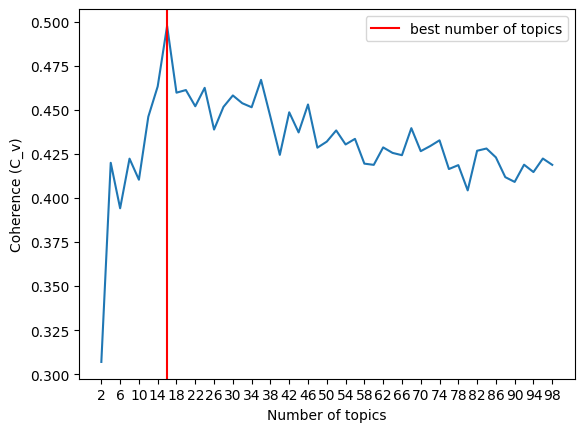

In [ ]:
from matplotlib import pyplot as plt

plt.plot(topic_counts, coherences)
plt.xticks(range(2, 100, 4), range(2, 100, 4))
plt.xlabel("Number of topics")
plt.ylabel("Coherence (C_v)")
plt.axvline(x=16, color='r', label='best number of topics')
plt.legend(loc=0)
plt.show()

Coherence is the highest with 16 topics.

### Find good number of passes

In [ ]:
from tqdm import tqdm
from gensim.models import CoherenceModel

pass_counts = range(2, 30, 4)
coherences = []

for pass_count in tqdm(pass_counts, total=len(pass_counts)):
    lda_model = LdaModel(bow_corpus, num_topics=16, id2word=dictionary, passes=pass_count,
                         minimum_probability=0.0, random_state=0)
    lda_coherence_model = CoherenceModel(model=lda_model, texts=processed_docs_test, dictionary=dictionary,
                                         coherence='c_v')
    coherences.append(lda_coherence_model.get_coherence())

100%|██████████| 7/7 [03:04<00:00, 26.31s/it]


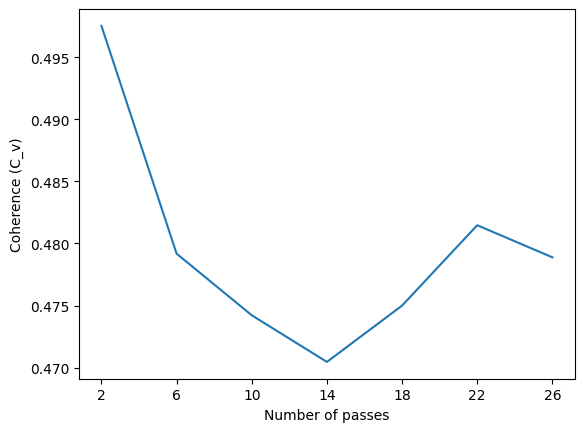

In [ ]:
plt.plot(pass_counts, coherences)
plt.xticks(pass_counts, pass_counts)
plt.xlabel("Number of passes")
plt.ylabel("Coherence (C_v)")
plt.show()

In [ ]:
from tqdm import tqdm
from gensim.models import CoherenceModel

pass_counts = range(1, 6, 1)
coherences = []

for pass_count in tqdm(pass_counts, total=len(pass_counts)):
    lda_model = LdaModel(bow_corpus, num_topics=16, id2word=dictionary, passes=pass_count,
                         minimum_probability=0.0, random_state=0)
    lda_coherence_model = CoherenceModel(model=lda_model, texts=processed_docs_test, dictionary=dictionary,
                                         coherence='c_v')
    coherences.append(lda_coherence_model.get_coherence())

100%|██████████| 5/5 [00:39<00:00,  7.96s/it]


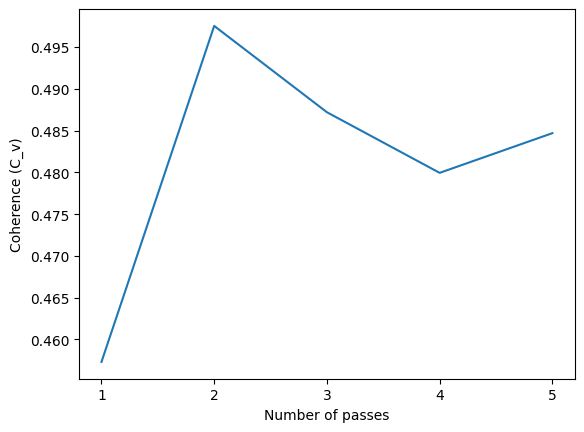

In [ ]:
plt.plot(pass_counts, coherences)
plt.xticks(pass_counts, pass_counts)
plt.xlabel("Number of passes")
plt.ylabel("Coherence (C_v)")
plt.show()

Coherence is the highest with 3 passes.

### Grid search for alpha and eta hyperparameters

In [28]:
from numpy import arange
from tqdm import tqdm
from gensim.models import CoherenceModel

topic_count = 16
pass_count = 3
alpha_vals = ['symmetric', 'asymmetric', 'auto', 0.01] + list(arange(0.1, 1., 0.2))
eta_vals = ['symmetric', 'auto', 0.01] + list(arange(0.1, 1., 0.2))

params = []
coherences = []
for alpha in tqdm(alpha_vals, total=len(alpha_vals)):
    for eta in eta_vals:
        lda_model = LdaModel(bow_corpus, num_topics=topic_count, id2word=dictionary, passes=pass_count,
                             minimum_probability=0.0, random_state=0, alpha=alpha, eta=eta)
        lda_coherence_model = CoherenceModel(model=lda_model, texts=processed_docs_test, dictionary=dictionary,
                                             coherence='c_v')
        coherences.append(lda_coherence_model.get_coherence())
        params.append((alpha, eta))

100%|██████████| 9/9 [08:20<00:00, 55.62s/it]


In [29]:
results = pd.DataFrame(params, columns=["alpha", "eta"])
results['coherence'] = coherences
results

In [30]:
max_params = (0, 0)
max_coherence = 0
for (alpha, eta), coherence in zip(params, coherences):
    if coherence > max_coherence:
        max_coherence = coherence
        max_params = (alpha, eta)
print(f"Max coherence of {max_coherence} for alpha={max_params[0]} and eta={max_params[1]}")

Max coherence of 0.52268541742454 for alpha=0.1 and eta=0.9000000000000001


## Final model evaluation

### Model creation

In [31]:
lda_model = LdaModel(bow_corpus, num_topics=16, id2word=dictionary, passes=3,
                     minimum_probability=0.0, random_state=0, alpha='symmetric', eta=0.5)

In [37]:
cpv_labels = {
    "03": "Agricultural, farming, fishing, forestry and related products",
    "09": "Petroleum products, fuel, electricity and other sources of energy",
    "14": "Mining, basic metals and related products",
    "15": "Food, beverages, tobacco and related products",
    "16": "Agricultural machinery",
    "18": "Clothing, footwear, luggage articles and accessories",
    "19": "Leather and textile fabrics, plastic and rubber materials",
    "22": "Printed matter and related products",
    "24": "Chemical products",
    "30": "Office and computing machinery, equipment and supplies except furniture and software packages",
    "31": "Electrical machinery, apparatus, equipment and consumables; Lighting",
    "32": "Radio, television, communication, telecommunication and related equipment",
    "33": "Medical equipments, pharmaceuticals and personal care products",
    "34": "Transport equipment and auxiliary products to transportation",
    "35": "Security, fire-fighting, police and defence equipment",
    "37": "Musical instruments, sport goods, games, toys, handicraft, art materials and accessories",
    "38": "Laboratory, optical and precision equipments (excl. glasses)",
    "39": "Furniture (incl. office furniture), furnishings, domestic appliances (excl. lighting) and cleaning products",
    "41": "Collected and purified water",
    "42": "Industrial machinery",
    "43": "Machinery for mining, quarrying, construction equipment",
    "44": "Construction structures and materials; auxiliary products to construction (excepts electric apparatus)",
    "45": "Construction work",
    "48": "Software package and information systems",
    "50": "Repair and maintenance services",
    "51": "Installation services (except software)",
    "55": "Hotel, restaurant and retail trade services",
    "60": "Transport services (excl. Waste transport)",
    "63": "Supporting and auxiliary transport services; travel agencies services",
    "64": "Postal and telecommunications services",
    "65": "Public utilities",
    "66": "Financial and insurance services",
    "70": "Real estate services",
    "71": "Architectural, construction, engineering and inspection services",
    "72": "IT services: consulting, software development, Internet and support",
    "73": "Research and development services and related consultancy services",
    "75": "Administration, defence and social security services",
    "76": "Services related to the oil and gas industry",
    "77": "Agricultural, forestry, horticultural, aquacultural and apicultural services",
    "79": "Business services: law, marketing, consulting, recruitment, printing and security",
    "80": "Education and training services",
    "85": "Health and social work services",
    "90": "Sewage-, refuse-, cleaning-, and environmental services",
    "92": "Recreational, cultural and sporting services",
    "98": "Other community, social and personal services",
}

-- Topic: 0 --
0.051*"study" + 0.022*"policy" + 0.014*"assessment" + 0.014*"objective" + 0.013*"impact" + 0.013*"evaluation" + 0.012*"support" + 0.011*"implementation" + 0.010*"measure" + 0.010*"market"

-- Topic: 1 --
0.058*"project" + 0.038*"technical" + 0.038*"health" + 0.033*"safety" + 0.032*"support" + 0.027*"risk" + 0.024*"assistance" + 0.018*"availability" + 0.017*"management" + 0.016*"funding"

-- Topic: 2 --
0.026*"social" + 0.024*"training" + 0.024*"communication" + 0.023*"survey" + 0.020*"online" + 0.020*"course" + 0.019*"platform" + 0.018*"activity" + 0.017*"learn" + 0.016*"content"

-- Topic: 3 --
0.059*"supply" + 0.031*"equipment" + 0.022*"site" + 0.022*"installation" + 0.021*"maintenance" + 0.016*"system" + 0.014*"purchase" + 0.012*"research" + 0.012*"laboratory" + 0.011*"centre"

-- Topic: 4 --
0.107*"service" + 0.039*"delegation" + 0.036*"travel" + 0.026*"agency" + 0.024*"security" + 0.020*"provision" + 0.018*"company" + 0.017*"person" + 0.016*"objective" + 0.015*"spec

In [33]:
from scipy.stats import entropy
import numpy as np


# https://github.com/soberbichler/Using-LDA-and-Jensen-Shannon-distance-to-separate-relevant-from-non-relevant-articles/blob/master/news_article_similarity_remigration_notebook.ipynb
def jensen_shannon(query, matrix):
    p = query[None, :].T
    q = matrix.T
    m = 0.5 * (p + q)
    return np.sqrt(0.5 * (entropy(p, m) + entropy(q, m)))


def get_doc_similarities(query, matrix):
    sims = jensen_shannon(query, matrix)  # list of jensen shannon distances
    return sims

In [34]:
corpus = df_train["title_texte"].apply(lambda x: dictionary.doc2bow(x.split(" ")))
all_dists = np.stack([np.array([tup[1] for tup in lst]) for lst in lda_model[list(corpus)]])

### Take the 3 closest notices

In [35]:
from tqdm import tqdm
from sklearn.metrics import classification_report

y_true = []
y_pred = []
notices = list(df_test.iloc)
for notice in tqdm(notices, total=len(notices)):
    notice_bow = dictionary.doc2bow(notice["title_texte"].split(" "))
    dist = np.array([tup[1] for tup in lda_model.get_document_topics(bow=notice_bow)])
    sims = get_doc_similarities(dist, all_dists)
    most_sim_ids = sims.argsort()[:3]  # the top k positional index of the smallest Jensen Shannon distances
    most_similar_df = df_train[df_train.index.isin(most_sim_ids)]
    y_true.append([int(notice[c] == True) for c in cpvs])
    y_pred.append([int(most_similar_df[c].sum() > 0) for c in cpvs])
print(classification_report(y_true, y_pred, target_names=[f"{cpv_labels[c][:40]}... | {c}" for c in cpvs]))

  0%|          | 0/2912 [00:00<?, ?it/s]/tmp/ipykernel_98153/3601534538.py:10: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(0.5 * (entropy(p, m) + entropy(q, m)))
100%|██████████| 2912/2912 [00:28<00:00, 102.47it/s]


                                                  precision    recall  f1-score   support

         Health and social work services... | 85       0.03      0.08      0.04        62
Construction structures and materials; a... | 44       0.00      0.00      0.00        23
         Repair and maintenance services... | 50       0.03      0.09      0.05        68
         Education and training services... | 80       0.03      0.08      0.04        99
Research and development services and re... | 73       0.10      0.27      0.14       249
                       Construction work... | 45       0.06      0.15      0.09       191
Architectural, construction, engineering... | 71       0.13      0.33      0.19       404
Business services: law, marketing, consu... | 79       0.24      0.50      0.33       688
Sewage-, refuse-, cleaning-, and environ... | 90       0.08      0.19      0.11       176
Office and computing machinery, equipmen... | 30       0.05      0.13      0.08        70
Security,

### Take the 10 closest notices

In [36]:
from tqdm import tqdm
from sklearn.metrics import classification_report

y_true = []
y_pred = []
notices = list(df_test.iloc)
for notice in tqdm(notices, total=len(notices)):
    notice_bow = dictionary.doc2bow(notice["title_texte"].split(" "))
    dist = np.array([tup[1] for tup in lda_model.get_document_topics(bow=notice_bow)])
    sims = get_doc_similarities(dist, all_dists)
    most_sim_ids = sims.argsort()[:10]  # the top k positional index of the smallest Jensen Shannon distances
    most_similar_df = df_train[df_train.index.isin(most_sim_ids)]
    y_true.append([int(notice[c] == True) for c in cpvs])
    y_pred.append([int(most_similar_df[c].sum() > 0) for c in cpvs])
print(classification_report(y_true, y_pred, target_names=[f"{cpv_labels[c][:40]}... | {c}" for c in cpvs]))

  0%|          | 0/2912 [00:00<?, ?it/s]/tmp/ipykernel_98153/3601534538.py:10: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(0.5 * (entropy(p, m) + entropy(q, m)))
100%|██████████| 2912/2912 [00:28<00:00, 102.94it/s]

                                                  precision    recall  f1-score   support

         Health and social work services... | 85       0.03      0.27      0.05        62
Construction structures and materials; a... | 44       0.00      0.04      0.01        23
         Repair and maintenance services... | 50       0.02      0.19      0.04        68
         Education and training services... | 80       0.03      0.25      0.06        99
Research and development services and re... | 73       0.09      0.58      0.15       249
                       Construction work... | 45       0.07      0.48      0.12       191
Architectural, construction, engineering... | 71       0.14      0.76      0.24       404
Business services: law, marketing, consu... | 79       0.23      0.89      0.37       688
Sewage-, refuse-, cleaning-, and environ... | 90       0.06      0.41      0.11       176
Office and computing machinery, equipmen... | 30       0.04      0.27      0.06        70
Security,